In [1]:
import qif
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.preprocessing import KBinsDiscretizer

plt.style.use("seaborn-whitegrid")
%matplotlib inline

In [2]:
from mestrado import datasets

In [3]:
def joint_distribution(df, x, y):
    joint_dist = df.groupby([x, y]).size().unstack()
    joint_dist.columns = joint_dist.columns.get_level_values(0)
    joint_dist = joint_dist.div(joint_dist.sum().sum())
    joint_dist.fillna(0, inplace=True)
    return joint_dist

In [4]:
def compute_leakages(df, x, y, causal=True):
    """
        Computes the average multiplicative and additive bayes' vulnerability
        and bayes' risk.
    """
    
    J = joint_distribution(df, x, y)
    pi = J.sum(axis=1) # X prior
    C_xy = J.divide(pi, axis=0) # C: X->Y
    sigma = J.sum(axis=0) # Y prior
    C_yx = J.T.divide(sigma, axis=0) # C: Y->X
    
    leakages = {}
    if causal == True:
        leakages['direct_bayes_vuln_mult_leakage'] = qif.measure.bayes_vuln.mult_leakage(pi, C_xy)
        leakages['reverse_bayes_vuln_mult_leakage'] = qif.measure.bayes_vuln.mult_leakage(sigma, C_yx)
        leakages['direct_bayes_risk_mult_leakage'] = qif.measure.bayes_risk.mult_leakage(pi, C_xy)
        leakages['reverse_bayes_risk_mult_leakage'] = qif.measure.bayes_risk.mult_leakage(sigma, C_yx)
        # leakages['direct_shannon_mult_leakage'] = qif.measure.shannon.mult_leakage(pi, C_xy)
        # leakages['reverse_shannon_mult_leakage'] = qif.measure.shannon.mult_leakage(sigma, C_yx)
        # leakages['direct_shannon_posterior'] = qif.measure.shannon.posterior(pi, C_xy)
        # leakages['reverse_shannon_posterior'] = qif.measure.shannon.posterior(sigma, C_yx)
        # leakages['direct_l_risk_mult_leakage'] = qif.measure.l_risk.mult_leakage(pi, C_xy)
        # leakages['reverse_l_risk_mult_leakage'] = qif.measure.l_risk.mult_leakage(sigma, C_yx)
        # leakages['direct_l_risk_posterior'] = qif.measure.l_risk.posterior(pi, C_xy)
        # leakages['reverse_l_risk_posterior'] = qif.measure.l_risk.posterior(sigma, C_yx)
        # leakages['direct_bayes_vuln_add_leakage'] = qif.measure.bayes_vuln.add_leakage(pi, C_xy)
        # leakages['reverse_bayes_vuln_add_leakage'] = qif.measure.bayes_vuln.add_leakage(sigma, C_yx)
        leakages['direct_bayes_vuln_min_entropy_leakage'] = qif.measure.bayes_vuln.min_entropy_leakage(pi, C_xy)
        leakages['reverse_bayes_vuln_min_entropy_leakage'] = qif.measure.bayes_vuln.min_entropy_leakage(sigma, C_yx)
        # leakages['direct_bayes_vuln_mult_capacity'] = qif.measure.bayes_vuln.mult_capacity(pi, C_xy)
        # leakages['reverse_bayes_vuln_mult_capacity'] = qif.measure.bayes_vuln.mult_capacity(sigma, C_yx)
        leakages['direct_bayes_vuln_posterior'] = qif.measure.bayes_vuln.posterior(pi, C_xy)
        leakages['reverse_bayes_vuln_posterior'] = qif.measure.bayes_vuln.posterior(sigma, C_yx)
    else:
        leakages['reverse_bayes_vuln_mult_leakage'] = qif.measure.bayes_vuln.mult_leakage(pi, C_xy)
        leakages['direct_bayes_vuln_mult_leakage'] = qif.measure.bayes_vuln.mult_leakage(sigma, C_yx)
        leakages['reverse_bayes_risk_mult_leakage'] = qif.measure.bayes_risk.mult_leakage(pi, C_xy)
        leakages['direct_bayes_risk_mult_leakage'] = qif.measure.bayes_risk.mult_leakage(sigma, C_yx)
        # leakages['reverse_shannon_mult_leakage'] = qif.measure.shannon.mult_leakage(pi, C_xy)
        # leakages['direct_shannon_mult_leakage'] = qif.measure.shannon.mult_leakage(sigma, C_yx)
        # leakages['reverse_shannon_posterior'] = qif.measure.shannon.posterior(pi, C_xy)
        # leakages['direct_shannon_posterior'] = qif.measure.shannon.posterior(sigma, C_yx)
        # leakages['reverse_l_risk_mult_leakage'] = qif.measure.l_risk.mult_leakage(pi, C_xy)
        # leakages['direct_l_risk_mult_leakage'] = qif.measure.l_risk.mult_leakage(sigma, C_yx)
        # leakages['reverse_l_risk_posterior'] = qif.measure.l_risk.posterior(pi, C_xy)
        # leakages['direct_l_risk_posterior'] = qif.measure.l_risk.posterior(sigma, C_yx)
        # leakages['reverse_bayes_vuln_add_leakage'] = qif.measure.bayes_vuln.add_leakage(pi, C_xy)
        # leakages['direct_bayes_vuln_add_leakage'] = qif.measure.bayes_vuln.add_leakage(sigma, C_yx)
        leakages['reverse_bayes_vuln_min_entropy_leakage'] = qif.measure.bayes_vuln.min_entropy_leakage(pi, C_xy)
        leakages['direct_bayes_vuln_min_entropy_leakage'] = qif.measure.bayes_vuln.min_entropy_leakage(sigma, C_yx)
        # leakages['reverse_bayes_vuln_mult_capacity'] = qif.measure.bayes_vuln.mult_capacity(pi, C_xy)
        # leakages['direct_bayes_vuln_mult_capacity'] = qif.measure.bayes_vuln.mult_capacity(sigma, C_yx)
        leakages['reverse_bayes_vuln_posterior'] = qif.measure.bayes_vuln.posterior(pi, C_xy)
        leakages['direct_bayes_vuln_posterior'] = qif.measure.bayes_vuln.posterior(sigma, C_yx)
    
    return leakages

In [5]:
breast_tumor = datasets.load_breast_tumor()
cholesterol = datasets.load_cholesterol()
pbc = datasets.load_pbc()
pollution = datasets.load_pollution()
autompg = datasets.load_autompg()
cpu = datasets.load_cpu()
breastw = datasets.load_breastw()
balance_scale = datasets.load_balance_scale()
servo = datasets.load_servo()
sensory = datasets.load_sensory()
pwlinear = datasets.load_pwlinear()
wisconsin = datasets.load_wisconsin()

In [6]:
databases = {
    'breast_tumor':breast_tumor,
    'cholesterol':cholesterol,
    'pbc':pbc,
    'pollution':pollution,
    'autompg':autompg,
    'cpu':cpu,
    'breastw':breastw,
    'balance_scale':balance_scale,
    'servo':servo,
    'sensory':sensory,
    'pwlinear':pwlinear,
    'wisconsin':wisconsin,
}

In [7]:
databases_ce_pairs = {
    'breast_tumor':[('tumor_size', 'inv_nodes'), ('tumor_size', 'deg_malig')],
    'cholesterol':[('chol', 'trestbps'), ('chol', 'fbs')],
    'pbc':[('stage', 'albumin'), ('stage', 'protime'), ('stage', 'bili')],
    'pollution':[('mort', 'ovr65')],
    'autompg':[('horsepower', 'mpg'), ('weight', 'mpg')],
    'cpu':[('myct', 'erp'), ('mmax', 'erp'), ('cach', 'erp')],
    'breastw':[('target', 'Clump_Thickness'), ('target', 'Cell_Shape_Uniformity'), ('target', 'Cell_Size_Uniformity')],
    'balance_scale':[('left_weight', 'target'), ('right_weight', 'target'), ('left_distance', 'target'), ('right_distance', 'target')],
    'servo':[('pgain', 'class'), ('vgain', 'class')],
    'sensory':[('trellis', 'score')],
    'pwlinear':[(f'a{n}', 'binaryClass') for n in range(1, 11)],
    'wisconsin':[('diagnosis', 'perimeter_mean'), ('diagnosis', 'smoothness_mean'), ('diagnosis', 'concavity_mean')]
}

causality_datasets = {'breast_tumor':'anticausal', 'cholesterol':'anticausal', 'pbc':'anticausal', 'pollution':'anticausal',
                      'autompg':'causal', 'cpu':'causal', 'breastw':'anticausal', 'balance_scale':'causal', 'servo':'causal',
                      'sensory':'causal', 'pwlinear':'causal', 'wisconsin':'anticausal'}

In [8]:
results = []

for n_bins in tqdm(range(2, 31)):
    est = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    for name, df in databases.items():
        for cause, effect in databases_ce_pairs[name]:
            #print(f"df: {name} | cause: {cause} | effect: {effect}")
            if df[cause].dtype.name != 'category':
                df[cause + "_cat"] = est.fit_transform(df[cause].values.reshape(-1, 1))
                cause = cause + "_cat"
                df[cause] = df[cause].astype('category')

            if df[effect].dtype.name != 'category':
                df[effect + "_cat"] = est.fit_transform(df[effect].values.reshape(-1, 1))
                effect = effect + "_cat"
                df[effect] = df[effect].astype('category')

            leakage = compute_leakages(df, cause, effect, causality_datasets[name])
            leakage['dataset'] = name
            # leakage['cause'] = cause
            # leakage['effect'] = effect
            # leakage['n_bins'] = n_bins
            #
            # corr, p_value = spearmanr(df[cause], df[effect])
            # leakage['spearman'] = corr
            # leakage['corr_p_value'] = p_value
            results.append(leakage)

100%|██████████| 29/29 [00:02<00:00,  9.97it/s]


In [9]:
df_results = pd.DataFrame(results)

In [10]:
df_results['label'] = df_results['dataset'].replace(causality_datasets)

In [11]:
cols_to_drop = ['dataset']
df_results.drop(columns=cols_to_drop, inplace=True)

In [30]:
import xgboost
from sklearn.model_selection import LeaveOneOut, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [13]:
df_results = df_results.replace([np.inf, -np.inf], np.nan).dropna()
#df_results['label'] = df_results['label'].replace({'causal':1, 'anticausal':0})

In [14]:
le = LabelEncoder()
df_results['encoded_label'] = le.fit_transform(df_results['label'])

In [15]:
X = df_results.drop(columns=['label', 'encoded_label'])
y = df_results.encoded_label

In [16]:
loo = LeaveOneOut()
scaler = StandardScaler()
estimator = xgboost.XGBRFClassifier(use_label_encoder=False)

parameters = {
    'max_depth': [2, 4, 6, 10],
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.1, 0.01, 0.05]
}

model = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 3,
    cv = 5
)

In [17]:
# y_pred = []
# y_true = []
#
# for train_idx, test_idx in tqdm(loo.split(X)):
#     X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#     y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
#
#     X_train_norm = scaler.fit_transform(X_train)
#
#     model.fit(X_train_norm, y_train)
#
#     y_pred.extend(model.predict(scaler.transform(X_test)))
#     y_true.extend(y_test)
#
# print(classification_report(y_true, y_pred))

In [23]:
y_pred = []
y_true = []
model = SVC()

for train_idx, test_idx in tqdm(loo.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    X_train_norm = scaler.fit_transform(X_train)
    
    model.fit(X_train_norm, y_train)
    
    y_pred.extend(model.predict(scaler.transform(X_test)))
    y_true.extend(y_test)
    
print(classification_report(y_true, y_pred))

1043it [00:10, 96.66it/s]

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       406
           1       0.91      0.94      0.93       637

    accuracy                           0.91      1043
   macro avg       0.91      0.90      0.90      1043
weighted avg       0.91      0.91      0.91      1043



In [27]:
estimator = RandomForestClassifier()

parameters = {
    'n_estimators': [200, 500, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [4, 6, 8, 12, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 4]
}

model = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'f1',
    n_jobs = 12,
    cv = 10
)

In [31]:
y_pred = []
y_true = []
kfold = KFold(n_splits=10, shuffle=False)

for train_idx, test_idx in tqdm(kfold.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train_norm = scaler.fit_transform(X_train)

    model.fit(X_train_norm, y_train)

    y_pred.extend(model.predict(scaler.transform(X_test)))
    y_true.extend(y_test)

print(classification_report(y_true, y_pred))

10it [05:38, 33.89s/it]

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       406
           1       0.97      0.97      0.97       637

    accuracy                           0.97      1043
   macro avg       0.97      0.97      0.97      1043
weighted avg       0.97      0.97      0.97      1043



In [38]:
importances = model.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.best_estimator_.estimators_], axis=0)

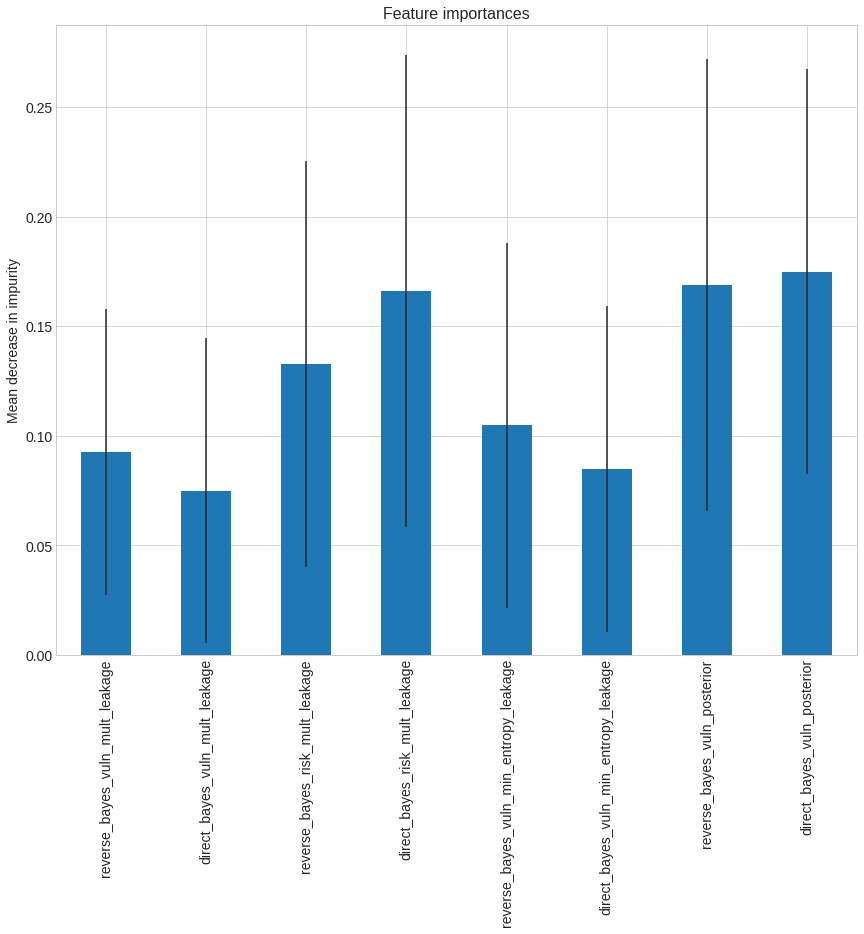

In [42]:
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots(figsize=(12, 12))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances", fontsize=16)
ax.set_ylabel("Mean decrease in impurity", fontsize=14)
fig.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [22]:
import statsmodels.api as sm

log_reg = sm.Logit(y, X).fit_regularized(method='l1', alpha=0)

print(log_reg.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.37308658847789955
            Iterations: 83
            Function evaluations: 83
            Gradient evaluations: 83
                           Logit Regression Results                           
Dep. Variable:          encoded_label   No. Observations:                 1043
Model:                          Logit   Df Residuals:                     1035
Method:                           MLE   Df Model:                            7
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                  0.4418
Time:                        14:35:19   Log-Likelihood:                -389.13
converged:                       True   LL-Null:                       -697.16
Covariance Type:            nonrobust   LLR p-value:                8.472e-129
                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------

In [42]:
from itertools import combinations
best_aic = float('inf')
best_model = None

for i in range(1, 8):
    for cols_ids in combinations(range(0, 8, 2), i):
        cols = []
        for col_id in cols_ids:
            cols.extend([col_id, col_id + 1])
        col_names = X.columns[cols]
        log_reg = sm.Logit(y, X[col_names]).fit()
        if log_reg.aic < best_aic:
            best_model = log_reg
            best_aic = log_reg.aic

Optimization terminated successfully.
         Current function value: 0.653178
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.447657
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.658872
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572967
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.443375
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.652099
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.555135
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.447027
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.439296
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.545346
  

In [43]:
print(best_model.summary())

                           Logit Regression Results                           
Dep. Variable:          encoded_label   No. Observations:                 1043
Model:                          Logit   Df Residuals:                     1035
Method:                           MLE   Df Model:                            7
Date:                Thu, 16 Sep 2021   Pseudo R-squ.:                  0.4418
Time:                        21:18:09   Log-Likelihood:                -389.13
converged:                       True   LL-Null:                       -697.16
Covariance Type:            nonrobust   LLR p-value:                8.472e-129
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
reverse_bayes_vuln_mult_leakage          -11.1029      2.072     -5.357      0.000     -15.165      -7.041
direct_bayes_vuln_mult_leakage             1.90